<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Análisis simbólico con Python</h1>
</div>

El análisis simbólico es una rama de las matemáticas computacionales que permite manipular expresiones algebraicas, resolver ecuaciones, derivar, integrar y trabajar con funciones de manera exacta, sin aproximaciones numéricas. En Python, la librería principal para realizar análisis simbólico es **SymPy**, que facilita el trabajo con variables simbólicas, matrices, polinomios y funciones matemáticas.

El análisis simbólico es fundamental en el desarrollo y aplicación de la inteligencia artificial, ya que permite automatizar cálculos complejos, verificar resultados y explorar propiedades matemáticas de manera eficiente. Esto es especialmente relevante en áreas como álgebra, cálculo, física, ingeniería y ciencias de datos, donde la IA puede potenciar la resolución de problemas y el descubrimiento de nuevos conocimientos.

La librería __Sympy__ (https://www.sympy.org/) es una librería de Python para álgebra simbólica. Esta librería permite trabajar con variables, funciones, matrices, etc. y substituir, derivar, integrar, despejar, factorizar de manera automática. Para esta materia, dada la gran cantidad de operaciones involucradas, nos ayudará a resolver algunos problemas de manera sencilla y con menos errores que al hacerlo manualmente.

Para utilizar la librería nos tenemos que asegurar de que esté instalada (el paquete por defecto de anaconda https://www.anaconda.com/products/individual-d la incluye) y después podemos importarla utilizando el siguiente comando:

In [1]:
import sympy as sp

In [2]:
from IPython.display import display as pp

__Nota:__ El `sp` es simplemente un _alias_ o modo alternativo para llamar a la librería, evitando escribir `sympy` cada vez. El alias `pp` lo usaremos para mostrar las expresiones usando una mejor representación.

Para poder manipular simbolos (variables algebraicas) necestiamos primero declararlas, para esto se puede usar el método `Symbol`:

In [3]:
x = sp.Symbol('x')

In [4]:
alpha = sp.Symbol('alpha')
alpha

alpha

Es necesario aquí reconocer que la `x` del lado izquierdo se refiere a la variable de __Python__ donde esta almacenado el símbolo 'x'.

Es decir, podemos hacer, por ejemplo:

In [5]:
a,b,c = sp.symbols('a,b,c')

In [6]:
pp(a, b, c)

a

b

c

que hará lo siguiente: toma el contenido de la variable x y lo multiplica dos tres veces.

Del anterior obtenemos:

In [7]:
y = x*x*x
y

x**3

In [8]:
y = 2*a*x + 2*b + x*c*x
y

2*a*x + 2*b + c*x**2

In [10]:
pp(x*x*x*3)

3*x**3

Nótese que `y` funciona como un _contenedor_ que tiene la expresión $x^3$. De la misma manera `x` contiene la expresión $x$.

Entender esta diferencia (variables de __Python__ y símbolos de __Sympy__) es fundamental para utilizar correctamente esta libería.

Si necesitamos declarar multiples símbolos podemos hacerlo con una sola expresión, usando `symbols`:

In [16]:
a,b,c = sp.symbols('alpha,beta,gamma')

In [17]:
a

alpha

In [18]:
b

beta

In [19]:
c

gamma

Para usar símbolos griegos basta declararlos con su nombre:

In [20]:
e = sp.Symbol('eta')

In [21]:
e

eta

In [22]:
help(sp.Symbol)

Help on class Symbol in module sympy.core.symbol:

class Symbol(sympy.core.expr.AtomicExpr, sympy.logic.boolalg.Boolean)
 |  Symbol(name, **assumptions)
 |
 |  Symbol class is used to create symbolic variables.
 |
 |  Explanation
 |  ===========
 |
 |  Symbolic variables are placeholders for mathematical symbols that can represent numbers, constants, or any other mathematical entities and can be used in mathematical expressions and to perform symbolic computations.
 |
 |  Assumptions:
 |
 |  commutative = True
 |  positive = True
 |  real = True
 |  imaginary = True
 |  complex = True
 |  complete list of more assumptions- :ref:`predicates`
 |
 |  You can override the default assumptions in the constructor.
 |
 |  Examples
 |  ========
 |
 |  >>> from sympy import Symbol
 |  >>> x = Symbol("x", positive=True)
 |  >>> x.is_positive
 |  True
 |  >>> x.is_negative
 |  False
 |
 |  passing in greek letters:
 |
 |  >>> from sympy import Symbol
 |  >>> alpha = Symbol('alpha')
 |  >>> alpha #

Los símbolos pueden estar formados por varias letras y pueden incluir subíndices `_` y superíndices `^`:

In [23]:
he, h1, hx = sp.symbols('h^e, h_1, h_x')

In [24]:
he

h^e

__Nota:__ esto puede no ser válido para los nombres en de las variables de __Python__.

## Operación algebraica de símbolos

__Nota:__ a partir de este punto y solo para mantener un documento más limpio se __omitirá__ el comando `pp()`, ya que __jupyter__ lo procesa automáticamente. Aquellos que utilicen __Spyder__ o alguna otra interfase necesitarán adicionarlo explicitamente.

In [25]:
pp(x)

x

Los operadores de suma `+`, resta `-`, multiplicación `*` y división `/` de __Python__ se pueden utilizar con los símbolos de forma transparente (la multiplicación siempre debe ser explícita, `2x` dará un error):

In [26]:
2*x

2*x

Para potencias se utiliza el doble asterisco `**` ya que el operador de potencia `^` es interpretado y utilizado por __Python__ para otras cosas.

In [27]:
x**3

x**3

Para substituir se puede usar el método `subs(variable,valor)`

In [30]:
y

2*a*x + 2*b + c*x**2

In [31]:
a

alpha

In [32]:
a = sp.Symbol('a')
a

a

In [33]:
y.subs(x,2).subs(a,1)

2*b + 4*c + 4

In [34]:
z = x/2 + 4*x/(2*x - a)
z

x/2 + 4*x/(-a + 2*x)

(Los paréntesis nos permiten que la expresión sea formada antes de levar a cabo substitución).

Las substituciones pueden ocurrir una después de la otra, o usando un diccionario:

In [35]:
z.subs(x,2).subs(a,1)

11/3

In [36]:
z.subs({x: 4, a: 2})

14/3

In [37]:
z

x/2 + 4*x/(-a + 2*x)

In [41]:
lx = [1,2,3,4,5]
la = [0,1,5,3,2]

In [40]:
lz=[]
for i in range(len(lx)):
    lz.append(z.subs({x: lx[i], a: la[i]}))
lz

[5/2, 11/3, 27/2, 26/5, 5]

Declaramos una función polinomial para los siguientes comandos:

In [42]:
z = x**3 + 4*x**2 + 2*x**3 + x
z

3*x**3 + 4*x**2 + x

El método `simplify` intentará obtener una expresión más sencilla:

In [43]:
z.simplify()

x*(3*x**2 + 4*x + 1)

In [44]:
# sin(x)^2 + cos(x)^2
(sp.sin(x)**2 + sp.cos(x)**2).simplify()

1

El método `factor` intentará factorizar la expresión:

In [45]:
z

3*x**3 + 4*x**2 + x

In [46]:
z_factor = z.factor()
z_factor

x*(x + 1)*(3*x + 1)

Por otro lado, el método `expand` aplicará la propiedad distributiva, expandiendo la expresión:

In [47]:
z_factor.expand()

3*x**3 + 4*x**2 + x

## Derivación e integración

Se pueden derivar expresiones usando el método `diff`:

In [48]:
z

3*x**3 + 4*x**2 + x

In [49]:
z.diff(x)

9*x**2 + 8*x + 1

In [50]:
sp.sin(sp.pi*x).diff(x)

pi*cos(pi*x)

Para integrar se utiliza el método `integrate`. Si se usa simplemente la variable la integral será indefinida:

In [51]:
sp.sin(sp.pi*x).diff(x)

pi*cos(pi*x)

In [52]:
sp.sin(sp.pi*x).diff(x)

pi*cos(pi*x)

Para integrales definidas se incluye la variable y los límites en una tupla `(variable, inferior, superior)`:

In [53]:
z.integrate((x, 0, 1))

31/12

In [54]:
sp.sin(sp.pi*x).integrate((x,0,1))

2/pi

## Vectores y matrices

Para declarar un vector o una matriz se utiliza la función `matrix` y una lista de listas:

In [55]:
m1 = sp.Matrix([[1,2], [3,4], [5,6]])
m1

Matrix([
[1, 2],
[3, 4],
[5, 6]])

In [56]:
v1 = sp.Matrix([6,5])
v1

Matrix([
[6],
[5]])

Las multiplicaciones de matrices se obtienen utilizando simplemente el operador `*` (siempre y cuando se cumplan las reglas de dichas operaciones):

In [57]:
m1*v1

Matrix([
[16],
[38],
[60]])

Para transponer cualquier vector o matriz se utiliza `.T`:

In [58]:
v1.T

Matrix([[6, 5]])

In [59]:
v2 = sp.Matrix([6,5,6])
v2

Matrix([
[6],
[5],
[6]])

In [60]:
v2.T*m1

Matrix([[51, 68]])

Para accesar los elementos, renglones o columnas de una matriz se utilizan los corchetes después de la expresión `[renglon, columna]`, con los dos puntos `:` para una línea o renglón completo (recordar que en __Python__ los subíndices siempre inician de cero):

In [61]:
m1

Matrix([
[1, 2],
[3, 4],
[5, 6]])

In [62]:
# Toda la columna 0
m1[0,1]

2

In [63]:
# Todo el renglón 2
m1[2,:]

Matrix([[5, 6]])

Para un vector podemos usar un sólo índice (`[número]`):

In [64]:
v1[0]

6

Es importante hacer notar que para __Sympy__ no es igual una matriz 1x1 que un número, de tal manera que:

In [65]:
v2.T*v2

Matrix([[97]])

Si queremos utilizar este valor como un número debemos extraerlo, utilizando su posición (`[0]` o `[0,0]`):

In [66]:
(v2.T*v2)[0,0]

97

En el caso de dos vectores podemos usar la operación punto:

In [67]:
v2.dot(v2)

97

Puede ser útil también el cálculo del determinante.

In [68]:
m2 = sp.Matrix([[1,2,3], [2,3,1], [4,4,1]])
m2

Matrix([
[1, 2, 3],
[2, 3, 1],
[4, 4, 1]])

In [69]:
m2.det()

-9

## Gráficas de funciones

Para graficar podemos usar `sp.plotting.plot`:

In [70]:
z

3*x**3 + 4*x**2 + x

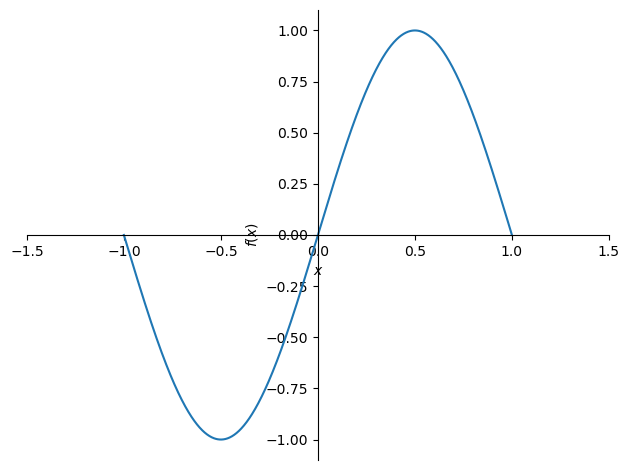

In [72]:
sp.plotting.plot(sp.sin(sp.pi*x), (x,-1,1), xlim=[-1.5,1.5])

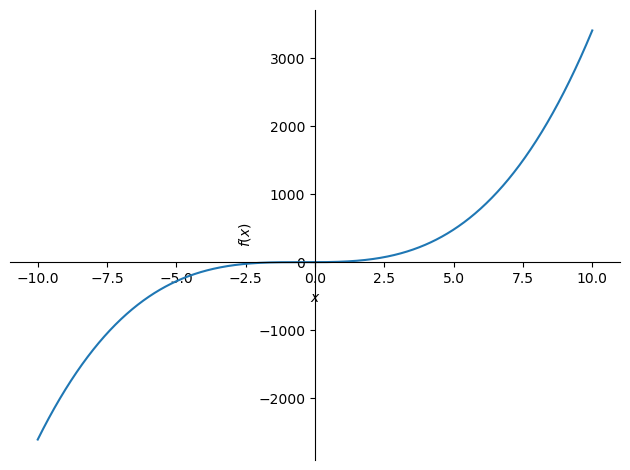

In [71]:
sp.plotting.plot(z)

In [73]:
help(sp.plotting.plot)

Help on function plot in module sympy.plotting.plot:

plot(*args, show=True, **kwargs)
    Plots a function of a single variable as a curve.

    Parameters

    args :
        The first argument is the expression representing the function
        of single variable to be plotted.

        The last argument is a 3-tuple denoting the range of the free
        variable. e.g. ``(x, 0, 5)``

        Typical usage examples are in the following:

        - Plotting a single expression with a single range.
            ``plot(expr, range, **kwargs)``
        - Plotting a single expression with the default range (-10, 10).
            ``plot(expr, **kwargs)``
        - Plotting multiple expressions with a single range.
            ``plot(expr1, expr2, ..., range, **kwargs)``
        - Plotting multiple expressions with multiple ranges.
            ``plot((expr1, range1), (expr2, range2), ..., **kwargs)``

        It is best practice to specify range explicitly because default
        range may 

Si queremos definir límites de la función se utiliza la misma notación que la integración. Por otro lado, si queremos definir los límites de la gráfica, se usan las palbras `xlim=` y `ylim=`, seguidos de los valores `[inferior, superior]`:

Esta función tiene diversas opciones, pero no se explorarán aqui.

## Combinando lo anterior

Todo lo anterior se puede usar en conjunto:

In [74]:
a*sp.Matrix([[x, x**2], 
             [x**3, x**-1]]).integrate((x,0,1)).subs(a,2)

Matrix([
[a/2,  a/3],
[a/4, oo*a]])

## Solución de ecuaciones

Suponiendo que tengamos una ecuación del tipo:

$$x^2 + 2*x = 5$$

Sympy buscará algebraicamente las soluciones usando el comando `sp.solve()`. Es necesario _igualar la expresión a cero_:

$$x^2 + 2*x - 5 = 0$$

In [75]:
expr = x**2 + 2*x - 5
expr

x**2 + 2*x - 5

Sistemas de ecuaciones pueden ser contenidos en una matriz (ya sea directamente o por una multiplicación) y resueltos con el mismo comando. Por ejemplo, un sistema $Mx=b$:

In [76]:
x1, x2 = sp.symbols('x_1,x_2')

x = sp.Matrix([x1,x2])
M = sp.Matrix([[1,2], [3,-2]])
b = sp.Matrix([8,16])

In [77]:
# Mx - b = 0
expr = M*x - b
expr

Matrix([
[   x_1 + 2*x_2 - 8],
[3*x_1 - 2*x_2 - 16]])

In [78]:
sp.solve(expr)

{x_1: 6, x_2: 1}